In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

In [3]:
import pandas as pd
path1="../city_day.csv"
path2="../city_hour.csv"
data_daily = pd.read_csv(path1)
data_hourly=pd.read_csv(path2)
data_daily.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data_daily=data_daily.dropna(subset=['AQI'])
data_hourly=data_hourly.dropna(subset=['AQI'])
#dropping every column except AQI, date and City
data_daily=data_daily[['City','Date','AQI']]
data_hourly=data_hourly[['City','Datetime','AQI']]
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    24850 non-null  object 
 1   Date    24850 non-null  object 
 2   AQI     24850 non-null  float64
dtypes: float64(1), object(2)
memory usage: 776.6+ KB


In [5]:
cities=['Delhi','Kolkata']
data_daily=data_daily[data_daily['City'].isin(cities)]
data_daily['Date']=pd.to_datetime(data_daily['Date'])
data_hourly=data_hourly[data_hourly['City'].isin(cities)]
data_hourly['DateT']=pd.to_datetime(data_hourly['Datetime'])
data_daily.describe()


,Date,AQI
count,2753,2753.000000
mean,2018-03-22 00:28:14.733018624,226.917181
min,2015-01-01 00:00:00,26.000000
25%,2016-11-20 00:00:00,111.000000
50%,2018-08-13 00:00:00,219.000000
75%,2019-07-23 00:00:00,324.000000
max,2020-07-01 00:00:00,716.000000
std,NaN,127.182038


In [6]:
delhi_daily=data_daily[data_daily['City']=='Delhi']
kolkata_daily=data_daily[data_daily['City']=='Kolkata']

delhi_hourly=data_hourly[data_hourly['City']=='Delhi']
kolkata_hourly=data_hourly[data_hourly['City']=='Kolkata']


In [7]:
print(delhi_daily['Date'].min())
print(delhi_daily['Date'].max())
print(kolkata_daily['Date'].min())
print(kolkata_daily['Date'].max())
# removing dates before 2018-05-07 00:00:00 from city1
delhi_daily=delhi_daily[delhi_daily['Date']>='2018-07-01 00:00:00']
kolkata_daily=kolkata_daily[kolkata_daily['Date']>='2018-07-01 00:00:00']

2015-01-01 00:00:00
2020-07-01 00:00:00
2018-04-11 00:00:00
2020-07-01 00:00:00


In [8]:
print(delhi_hourly['DateT'].min())
print(delhi_hourly['DateT'].max())
print(kolkata_hourly['DateT'].min())
print(kolkata_hourly['DateT'].max())
# removing dates before 2018-05-07 00:00:00 from city1
delhi_hourly=delhi_hourly[delhi_hourly['DateT']>='2018-07-01 00:00:00']
kolkata_hourly=kolkata_hourly[kolkata_hourly['DateT']>='2018-07-01 00:00:00']

2015-01-01 16:00:00
2020-07-01 00:00:00
2018-04-11 01:00:00
2020-07-01 00:00:00


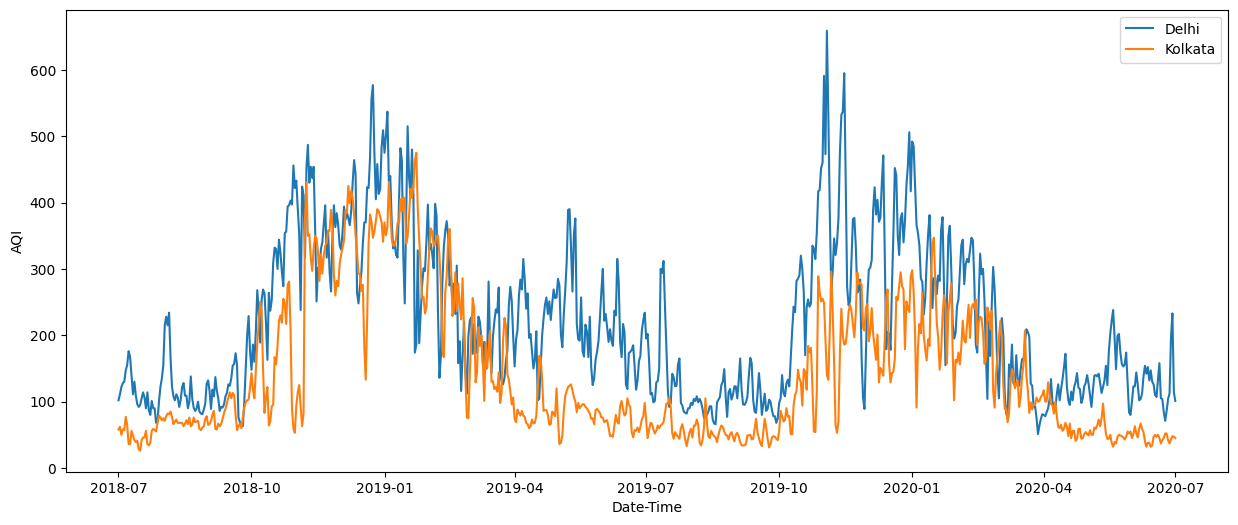

In [9]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(delhi_daily['Date'],delhi_daily['AQI'],label='Delhi')
plt.plot(kolkata_daily['Date'],kolkata_daily['AQI'],label='Kolkata')
plt.xlabel('Date-Time')
plt.ylabel('AQI')
plt.legend()
plt.show()


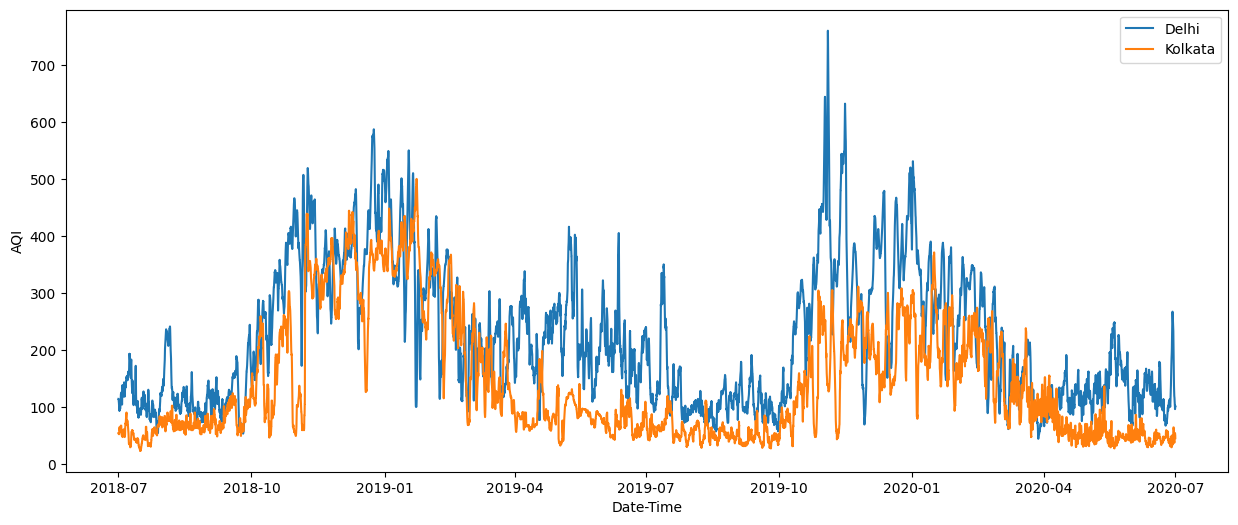

In [10]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(delhi_hourly['DateT'],delhi_hourly['AQI'],label='Delhi')
plt.plot(kolkata_hourly['DateT'],kolkata_hourly['AQI'],label='Kolkata')
plt.xlabel('Date-Time')
plt.ylabel('AQI')
plt.legend()
plt.show()


In [11]:
def calculate_monthly_stats(city_data):
    monthly_stats = {}
    for year in city_data['Date'].dt.year.unique():
        monthly_stats[year] = {}
        for month in range(1, 13):
            # Filter data for the specific year and month
            month_data = city_data[(city_data['Date'].dt.year == year) & (city_data['Date'].dt.month == month)]
            
            if not month_data.empty:
                # Calculate mean and variance for each city within this month
                monthly_stats[year][month] = month_data.groupby('City')['AQI'].agg(['mean', 'var']).to_dict(orient='index')
                
    # Convert to DataFrame for easier viewing
    monthly_stats_df = pd.DataFrame.from_dict({(year, month): monthly_stats[year][month] 
                                               for year in monthly_stats.keys() 
                                               for month in monthly_stats[year].keys()},
                                              orient='index')
    return monthly_stats_df

monthly_stats_delhi = calculate_monthly_stats(delhi_daily)
monthly_stats_kolkata = calculate_monthly_stats(kolkata_daily)

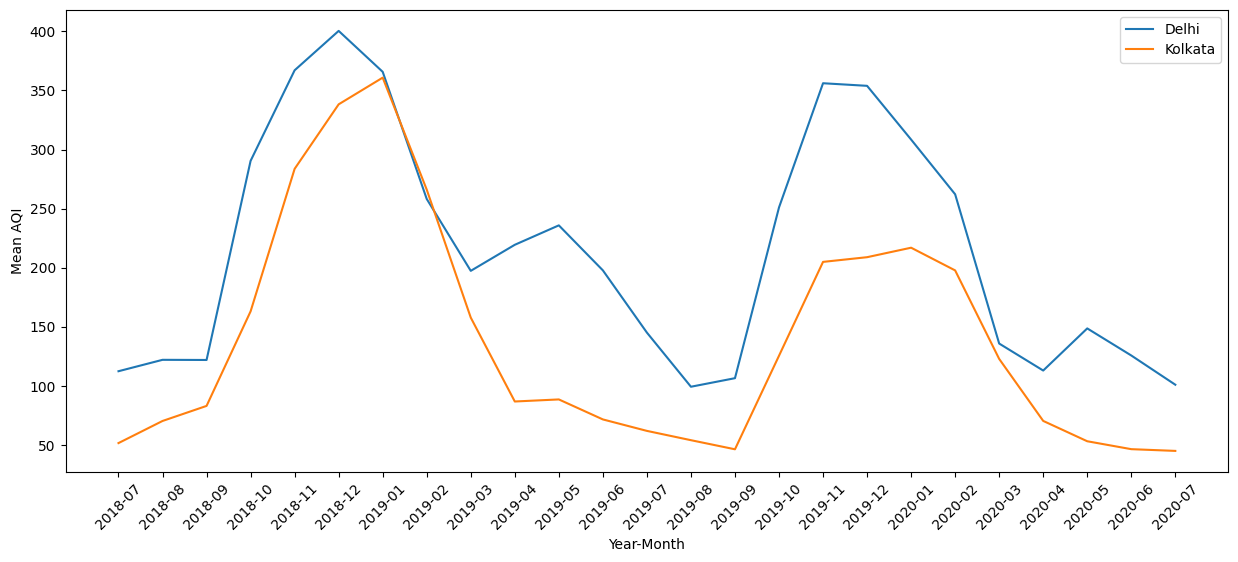

In [12]:
# Plotting monthly mean AQI for Delhi and Mumbai
plt.figure(figsize=(15,6))
monthly_stats_delhi['Delhi'].apply(lambda x: x['mean']).plot(label='Delhi')
monthly_stats_kolkata['Kolkata'].apply(lambda x: x['mean']).plot(label='Kolkata')
plt.xlabel('Year-Month')
plt.ylabel('Mean AQI')
plt.legend()
plt.xticks(ticks=range(len(monthly_stats_delhi.index)), labels=[f"{year}-{month:02d}" for year, month in monthly_stats_delhi.index], rotation=45)
plt.show()


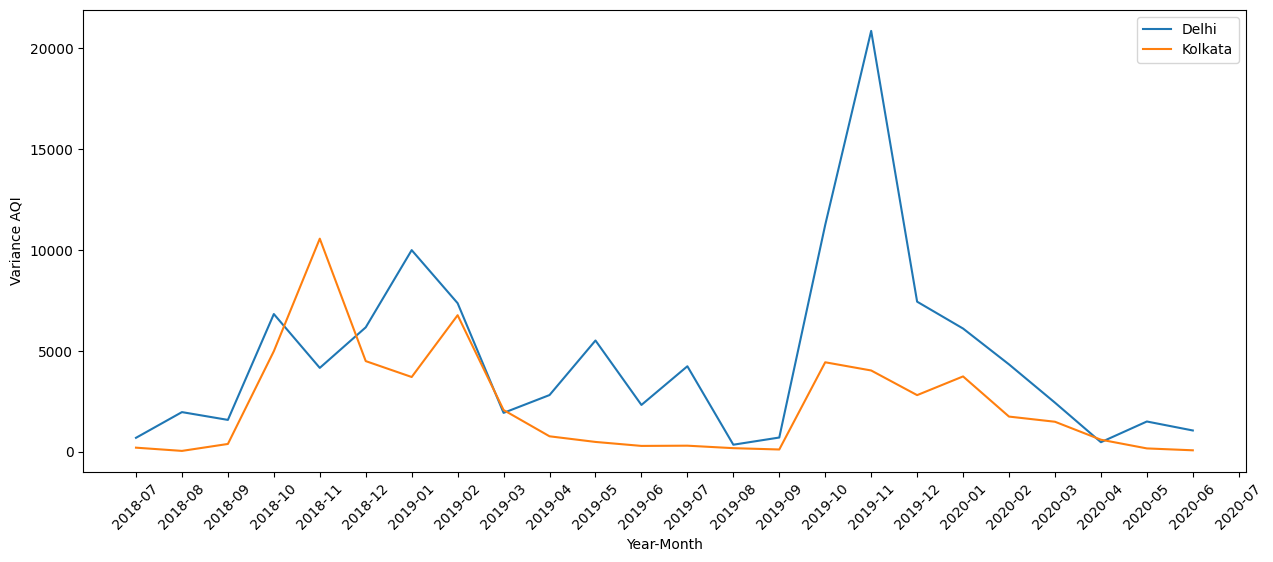

In [13]:
# Plotting monthly variance of AQI for Delhi and Mumbai
plt.figure(figsize=(15,6))
monthly_stats_delhi['Delhi'].apply(lambda x: x['var']).plot(label='Delhi')
monthly_stats_kolkata['Kolkata'].apply(lambda x: x['var']).plot(label='Kolkata')
plt.xlabel('Year-Month')
plt.ylabel('Variance AQI')
plt.legend()
plt.xticks(ticks=range(len(monthly_stats_delhi.index)), labels=[f"{year}-{month:02d}" for year, month in monthly_stats_delhi.index], rotation=45)
plt.show()


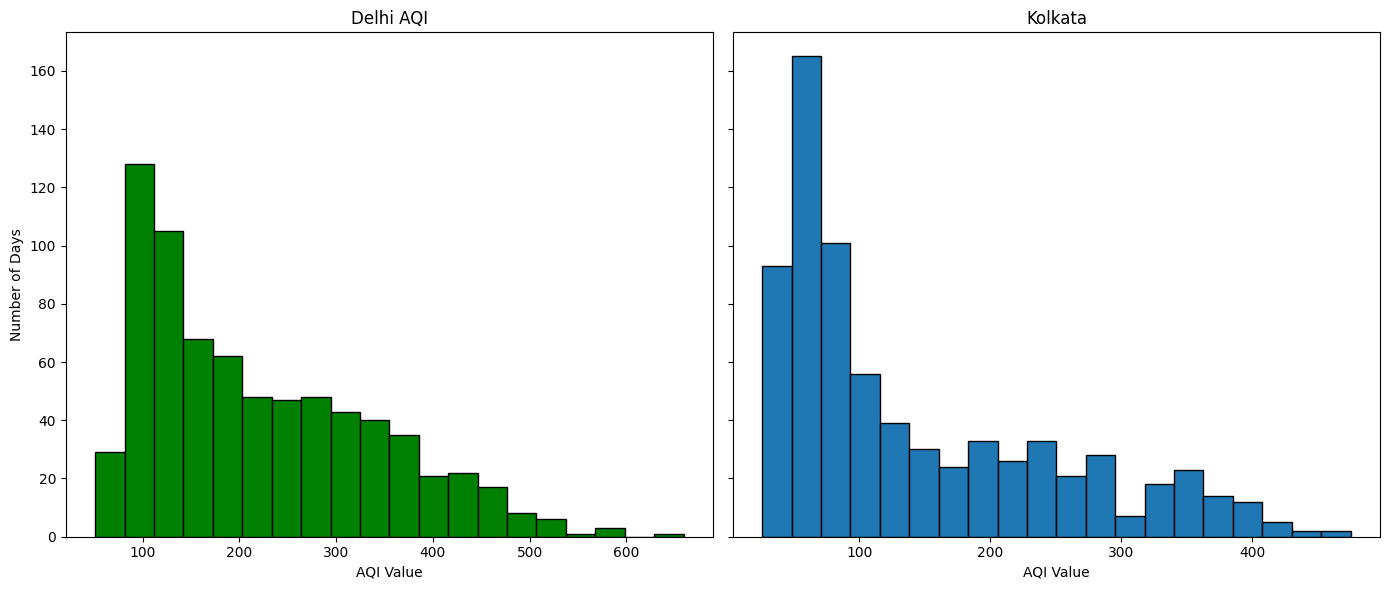

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(delhi_daily['AQI'], bins=20,color='green' ,edgecolor='black')
axes[0].set_title('Delhi AQI')
axes[0].set_xlabel('AQI Value')
axes[0].set_ylabel('Number of Days')

# Kolkata AQI Histogram
axes[1].hist(kolkata_daily['AQI'], bins=20, edgecolor='black')
axes[1].set_title('Kolkata')
axes[1].set_xlabel('AQI Value')

# Show the plots
plt.tight_layout()
plt.show()

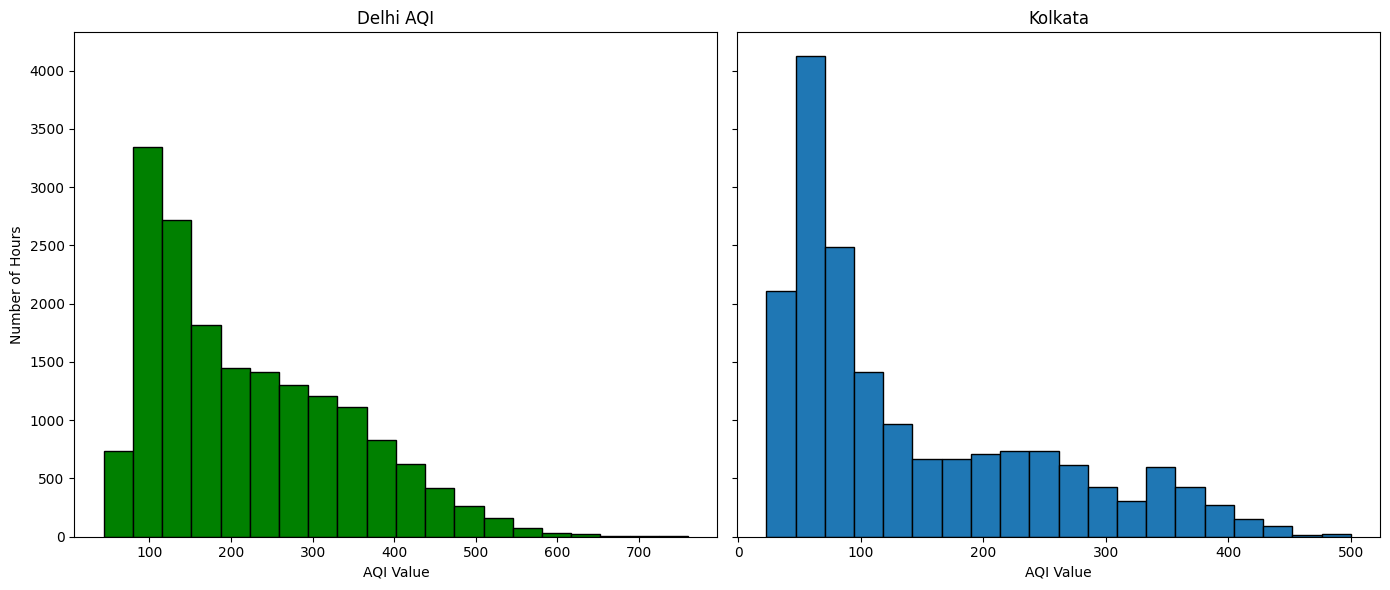

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(delhi_hourly['AQI'], bins=20,color='green' ,edgecolor='black')
axes[0].set_title('Delhi AQI')
axes[0].set_xlabel('AQI Value')
axes[0].set_ylabel('Number of Hours')

# Kolkata AQI Histogram
axes[1].hist(kolkata_hourly['AQI'], bins=20, edgecolor='black')
axes[1].set_title('Kolkata')
axes[1].set_xlabel('AQI Value')

# Show the plots
plt.tight_layout()
plt.show()

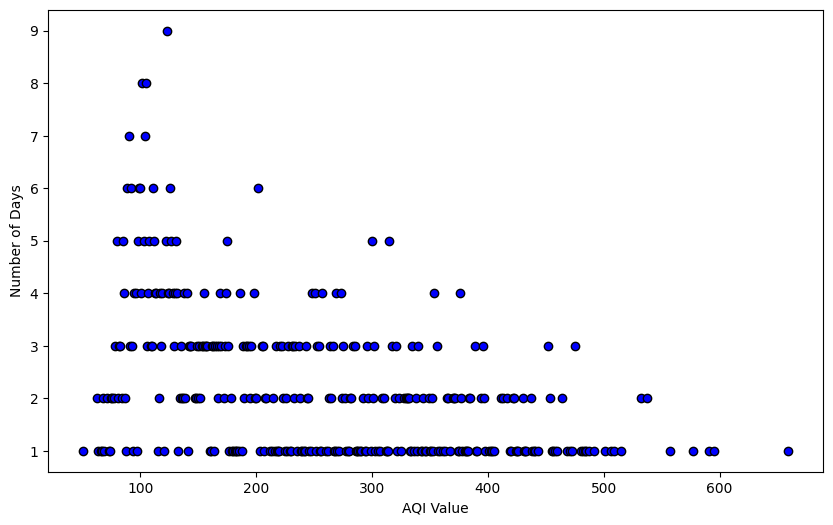

In [16]:
x=delhi_daily[(delhi_daily['City'] == 'Delhi') & (delhi_daily['Date'] >= '2018-07-01') & (delhi_daily['Date'] <= '2020-07-01')]
aqi_counts = x['AQI'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(aqi_counts.index, aqi_counts.values, color='blue', edgecolor='black')
plt.xlabel('AQI Value')
plt.ylabel('Number of Days')
plt.show()

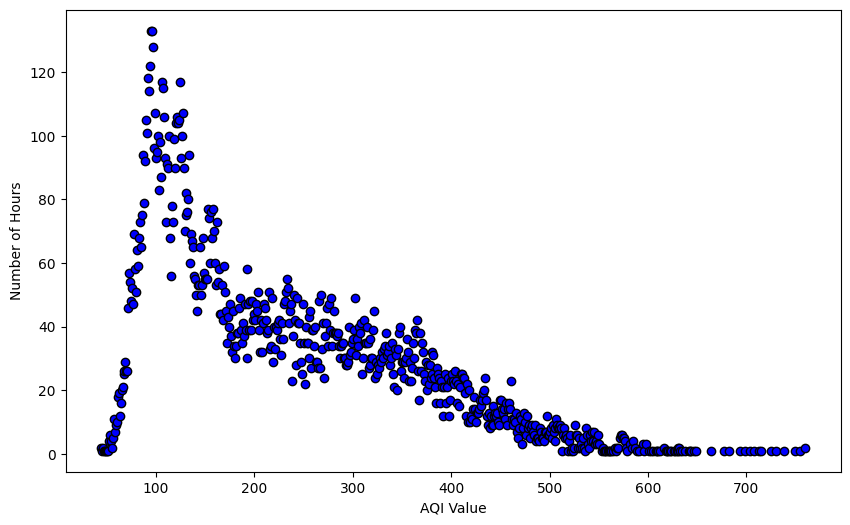

In [17]:
x=delhi_hourly[(delhi_hourly['City'] == 'Delhi') & (delhi_hourly['DateT'] >= '2018-07-01') & (delhi_hourly['DateT'] <= '2020-07-01')]
aqi_counts = x['AQI'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(aqi_counts.index, aqi_counts.values, color='blue', edgecolor='black')
plt.xlabel('AQI Value')
plt.ylabel('Number of Hours')
plt.show()

In [18]:
delhi_daily=delhi_daily[delhi_daily['Date']<='2020-05-01 00:00:00']
kolkata_daily=kolkata_daily[kolkata_daily['Date']<='2020-05-01 00:00:00']
delhi_hourly=delhi_hourly[delhi_hourly['DateT']<='2020-05-01 00:00:00']
kolkata_hourly=kolkata_hourly[kolkata_hourly['DateT']<='2020-05-01 00:00:00']

In [19]:

def calculate_aqi_stats(city_data, start_date, end_date):
    # Filter data for the specified date range
    filtered_data = city_data[(city_data['DateT'] >= start_date) & (city_data['DateT'] <= end_date)]
    
    # Calculate mean and variance
    mean_aqi = filtered_data['AQI'].mean()
    variance_aqi = filtered_data['AQI'].var()
    
    # Store the results in a dictionary
    aqi_stats = {
        'mean': mean_aqi,
        'variance': variance_aqi
    }
    
    return aqi_stats

# Example usage:
start_date = '2018-07-01'
end_date = '2020-07-01'
delhi_aqi_stats = calculate_aqi_stats(delhi_hourly, start_date, end_date)
kolkata_aqi_stats = calculate_aqi_stats(kolkata_hourly, start_date, end_date)

print("Delhi AQI Stats:", delhi_aqi_stats)
print("Kolkata AQI Stats:", kolkata_aqi_stats)


Delhi AQI Stats: {'mean': 228.11149804116658, 'variance': 14858.957281344043}
Kolkata AQI Stats: {'mean': 151.06946085442448, 'variance': 11401.372600262786}


In [20]:
from pandas.tseries.offsets import DateOffset

def calculate_aqi_stats_intervals(city_data, start_date, end_date, interval_months=2):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    current_start = start_date
    means = []
    variances = []
    
    while current_start < end_date:
        current_end = current_start + DateOffset(months=interval_months)
        if current_end > end_date:
            current_end = end_date
        
        stats = calculate_aqi_stats(city_data, current_start, current_end)
        means.append(stats['mean'])
        variances.append(stats['variance'])
        
        current_start = current_end
    
    return means, variances

# Example usage:
start_date = '2018-07-01'
end_date = '2020-07-01'
delhi_aqi_stats_intervals = calculate_aqi_stats_intervals(delhi_hourly, start_date, end_date)
kolkata_aqi_stats_intervals = calculate_aqi_stats_intervals(kolkata_hourly, start_date, end_date)

print("Delhi AQI Stats Intervals:", delhi_aqi_stats_intervals)
print("Kolkata AQI Stats Intervals:", kolkata_aqi_stats_intervals)
len(delhi_aqi_stats_intervals[1])

Delhi AQI Stats Intervals: ([117.2505036937542, 207.6778156996587, 384.0914675767918, 314.6033874382498, 208.2703071672355, 217.04709897610923, 122.24781732706515, 180.1392491467577, 355.0532423208191, 286.00902151283833, 124.62798634812286, 144.0], [1406.156963791821, 11446.143394132678, 5903.831791902124, 12152.181570438062, 2725.0307092635076, 4852.264856673941, 2892.99970121392, 11333.012017195397, 14436.58596113318, 6067.910335222453, 1722.4045440981743, nan])
Kolkata AQI Stats Intervals: ([61.00604432505037, 123.64368600682594, 311.39795221843, 315.70642201834863, 122.84846416382253, 80.21911262798635, 57.98321020819342, 86.73310580204779, 206.92969283276452, 207.63983344899376, 97.02252559726962, 69.0], [246.3003666673888, 4423.747270557079, 8147.413247169845, 7503.888327372623, 2813.295327216099, 559.7395251683173, 299.19662651559463, 3959.34333631735, 3573.609124564054, 3148.8778288611306, 1981.919574218094, nan])


12

In [21]:
import numpy as np

# Function to remove NaN values from lists
def remove_nan_values(stats_intervals):
    means, variances = stats_intervals
    means = [value for value in means if not np.isnan(value)]
    variances = [value for value in variances if not np.isnan(value)]
    return means, variances

# Remove NaN values from the intervals
delhi_aqi_stats_intervals = remove_nan_values(delhi_aqi_stats_intervals)
kolkata_aqi_stats_intervals = remove_nan_values(kolkata_aqi_stats_intervals)

print("Delhi AQI Stats Intervals without NaN:", delhi_aqi_stats_intervals)
print("Kolkata AQI Stats Intervals without NaN:", kolkata_aqi_stats_intervals)
# Adding another value to the intervals
delhi_aqi_stats_intervals[1].append(1444.38)

kolkata_aqi_stats_intervals[1].append(1243.83)

print("Updated Delhi AQI Stats Intervals:", delhi_aqi_stats_intervals)
print("Updated Kolkata AQI Stats Intervals:", kolkata_aqi_stats_intervals)

Delhi AQI Stats Intervals without NaN: ([117.2505036937542, 207.6778156996587, 384.0914675767918, 314.6033874382498, 208.2703071672355, 217.04709897610923, 122.24781732706515, 180.1392491467577, 355.0532423208191, 286.00902151283833, 124.62798634812286, 144.0], [1406.156963791821, 11446.143394132678, 5903.831791902124, 12152.181570438062, 2725.0307092635076, 4852.264856673941, 2892.99970121392, 11333.012017195397, 14436.58596113318, 6067.910335222453, 1722.4045440981743])
Kolkata AQI Stats Intervals without NaN: ([61.00604432505037, 123.64368600682594, 311.39795221843, 315.70642201834863, 122.84846416382253, 80.21911262798635, 57.98321020819342, 86.73310580204779, 206.92969283276452, 207.63983344899376, 97.02252559726962, 69.0], [246.3003666673888, 4423.747270557079, 8147.413247169845, 7503.888327372623, 2813.295327216099, 559.7395251683173, 299.19662651559463, 3959.34333631735, 3573.609124564054, 3148.8778288611306, 1981.919574218094])
Updated Delhi AQI Stats Intervals: ([117.25050369

In [22]:
#calculating mean and variance of Delhi AQI Stats Intervals
import numpy as np
def calculate_mean_variance(aqi_intervals):
    means, variances = aqi_intervals
    sample_mean = np.mean(means)
    sample_variance = np.var(variances, ddof=1)
    return sample_mean, sample_variance

In [23]:
mean_delhi, variance_delhi = calculate_mean_variance(delhi_aqi_stats_intervals)
mean_delhi, variance_delhi


(221.75149143395018, 22490083.442791667)

In [24]:

mean_kolkata, variance_kolkata = calculate_mean_variance(kolkata_aqi_stats_intervals)
mean_kolkata, variance_kolkata


(145.01083743747773, 6796891.944188609)

In [25]:
def standard_error_of_difference(var1, var2, n1, n2):
    """Calculate the standard error of the difference between two means."""
    se = np.sqrt((var1 / n1) + (var2 / n2))
    return se

In [26]:
from scipy.stats import norm
mean_dff=mean_delhi-mean_kolkata
sdd= standard_error_of_difference(variance_delhi, variance_kolkata, 360, 360)
mean_dff, sdd


(76.74065399647245, 285.22396359401245)

In [27]:

z_critical = norm.ppf(0.975) 
ci_lower = mean_dff - z_critical * sdd  
ci_upper = mean_dff + z_critical * sdd
ci_lower, ci_upper

(-482.28804217555546, 635.7693501685004)